In [2]:
import os,sys,string, time
import ROOT
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle

import csv

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
import Utilities.Functions as Functions

print('Success')

Welcome to JupyROOT 6.24/06
Success


## Reading in single file

In [23]:
location = '../NuMI_MC/SLIMMED_neutrinoselection_filt_run1_overlay.root'
file = uproot3.open(location)['nuselection/SubRun']

if b"pot" in file.keys(): print("POT exists")
else: print("POT doesn't exist")

location = '../NuMI_data/neutrinoselection_filt_run1_beamoff.root'
file_new = uproot3.open(location)['nuselection/SubRun']
print(file_new.keys())
if "pot" in file_new.keys(): print("POT exists")
else: print("POT doesn't exist")

POT exists
[b'run', b'subRun']
POT doesn't exist


In [25]:
def Single_file_POT_events(location): #Returns the cumulative POT of the sample at the "location" and number of events
    file = uproot3.open(location)['nuselection/SubRun']
    file_evs = uproot3.open(location)['nuselection/NeutrinoSelectionFilter']
    events = file_evs.numentries
    if b"pot" in file.keys(): #POT exists
        POT = Functions.POT_counter(file)
    else: POT = None #POT doesn't exist

    return POT, events

def Single_file_POT_scaling(POT, Run, file_type): #Do not use for EXT
    # print("Calculating scaling for " + Run + " " + file_type)
    if POT == None:
        print("No POT for this file. Assuming EXT file.")
        if Run == "run1":SF = Constants.SF_EXT_run1
        if Run == "run3":SF = Constants.SF_EXT_run1

        return SF
    if Run == "run1": #Not EXT file
        Data_POT = Constants.Run1_POT
        further_scaling = {"signal":Constants.NuMI_KDAR_scaling_run1,
                           "overlay":1.0,
                           "dirt":Constants.DIRT_run1_scaling}
    if Run == "run3": #Not EXT file
        Data_POT = Constants.Run3_POT
        further_scaling = {"signal":Constants.NuMI_KDAR_scaling_run3,
                           "overlay":1.0,
                           "dirt":Constants.DIRT_run3_scaling}
    SF = (Data_POT/POT)*further_scaling[file_type]

    return SF
    
# loc = '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_10_Umu4_majorana_numi_RHC.root'
loc = '../NuMI_signal/KDAR_dump/sfnues/DetVars/150_CV_run1.root'
file_type = "signal" #"signal", "overlay" or "dirt"
Run="run1"
POT = Single_file_POT_events(loc)[0]

Single_file_POT_scaling(POT, Run, file_type)


3.592676027097128e-06

In [5]:
loc = '../NuMI_MC/neutrinoselection_filt_run1_dirt_overlay.root'

file_type = "signal" #"signal", "overlay" or "dirt"
Run="run1"
POT, events = Single_file_POT_events(loc)

print(events)

Single_file_POT_scaling(POT, Run, file_type)


3.5533992790484712e-06

In [33]:
loc_dict = {"overlay":'../NuMI_MC/SLIMMED_neutrinoselection_filt_run3_overlay.root',
            "dirt":'../NuMI_MC/neutrinoselection_filt_run3_dirt_overlay.root',
            "ext":'../NuMI_data/neutrinoselection_filt_run3_beamoff.root'}

events_dict = {}
for file in loc_dict:

    file_type = file #"signal", "overlay" or "dirt"
    Run="run3"
    POT, events = Single_file_POT_events(loc_dict[file])
    events_dict[file] = events
    print(f"{Run} {file} has " + str(events) + " events.")


# Single_file_POT_scaling(POT, Run, file_type)

run3 overlay has 748702 events.
run3 dirt has 389264 events.
run3 ext has 3211097 events.


In [32]:
run3_new_gen_file_loc_dict = {2: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_2_ee_Umu4_majorana_RHC.root',
                              10: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_10_ee_Umu4_majorana_RHC.root',
                              20: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_20_ee_Umu4_majorana_RHC.root',
                              50: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_50_ee_Umu4_majorana_RHC.root',
                              100: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_100_ee_Umu4_majorana_RHC.root',
                              150: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_150_ee_Umu4_majorana_RHC.root',
                              180: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_180_ee_Umu4_majorana_RHC.root',
                              200: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_200_ee_Umu4_majorana_RHC.root',
                              220: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_220_ee_Umu4_majorana_RHC.root',
                              240: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_240_ee_Umu4_majorana_RHC.root',
                              245: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_245_ee_Umu4_majorana_RHC.root',
                              "150_pi0": '../NuMI_signal/KDAR_dump/sfnues/pi0/sfnues_KDAR_dump_150_pi0_Umu4_majorana_RHC.root',
                              "180_pi0": '../NuMI_signal/KDAR_dump/sfnues/pi0/sfnues_KDAR_dump_180_pi0_Umu4_majorana_RHC.root',
                              "200_pi0": '../NuMI_signal/KDAR_dump/sfnues/pi0/sfnues_KDAR_dump_200_pi0_Umu4_majorana_RHC.root',
                              "220_pi0": '../NuMI_signal/KDAR_dump/sfnues/pi0/sfnues_KDAR_dump_220_pi0_Umu4_majorana_RHC.root',
                              "240_pi0": '../NuMI_signal/KDAR_dump/sfnues/pi0/sfnues_KDAR_dump_240_pi0_Umu4_majorana_RHC.root',
                              "245_pi0": '../NuMI_signal/KDAR_dump/sfnues/pi0/sfnues_KDAR_dump_245_pi0_Umu4_majorana_RHC.root'}

events_dict = {}
for file in run3_new_gen_file_loc_dict:

    file_type = "signal" #"signal", "overlay" or "dirt"
    Run="run3"
    POT, events = Single_file_POT_events(run3_new_gen_file_loc_dict[file])
    events_dict[file] = events
    print(f"{Run} {file} has " + str(events) + " events.")
    

run3 2 has 45159 events.
run3 10 has 44463 events.
run3 20 has 46022 events.
run3 50 has 44579 events.
run3 100 has 45304 events.
run3 150 has 44975 events.
run3 180 has 46038 events.
run3 200 has 45003 events.
run3 220 has 46093 events.
run3 240 has 44894 events.
run3 245 has 46114 events.
run3 150_pi0 has 45827 events.
run3 180_pi0 has 44811 events.
run3 200_pi0 has 43943 events.
run3 220_pi0 has 44503 events.
run3 240_pi0 has 45704 events.
run3 245_pi0 has 44073 events.


In [54]:
run1_old_gen_file_loc_dict = {20: '../NuMI_signal/KDAR_dump/sfnues/OLD_gen_files/sfnues_KDAR_dump_20_Umu4_majorana_numi_RHC.root',
                              50: '../NuMI_signal/KDAR_dump/sfnues/OLD_gen_files/sfnues_KDAR_dump_50_Umu4_majorana_numi_RHC.root',
                              100: '../NuMI_signal/KDAR_dump/sfnues/OLD_gen_files/sfnues_KDAR_dump_100_Umu4_majorana_numi_RHC.root',
                              150: '../NuMI_signal/KDAR_dump/sfnues/OLD_gen_files/sfnues_KDAR_dump_150_Umu4_majorana_numi_RHC.root',
                              180: '../NuMI_signal/KDAR_dump/sfnues/OLD_gen_files/sfnues_KDAR_dump_180_Umu4_majorana_numi_RHC.root',
                              200: '../NuMI_signal/KDAR_dump/sfnues/OLD_gen_files/sfnues_KDAR_dump_200_Umu4_majorana_numi_RHC.root'}

file_loc_dict = run1_old_gen_file_loc_dict
POT_dict = {}
events_dict = {}
SF_dict = {}

for file in file_loc_dict:
    file_type = "signal"
    Run="run1"
    POT_dict[file], events_dict[file] = Single_file_POT_events(file_loc_dict[file])
    
    SF_dict[file] = Single_file_POT_scaling(POT_dict[file], Run, file_type)

for SF in SF_dict:
    print(f"{SF} SF is : " + str(SF_dict[SF]))

20 SF is : 2.1387912933253144e-12
50 SF is : 6.590170245207509e-10
100 SF is : 6.913852703765691e-08
150 SF is : 3.301953636715338e-06
180 SF is : 3.479531678617752e-05
200 SF is : 9.077313301681812e-05


## Making ratio of events for two sets of samples

In [55]:
run1_new_gen_file_loc_dict = {2: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_2_ee_Umu4_majorana_RHC.root',
                              10: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_10_ee_Umu4_majorana_RHC.root',
                              20: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_20_ee_Umu4_majorana_RHC.root',
                              50: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_50_ee_Umu4_majorana_RHC.root',
                              100: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_100_ee_Umu4_majorana_RHC.root',
                              150: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_150_ee_Umu4_majorana_RHC.root',
                              180: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_180_ee_Umu4_majorana_RHC.root',
                              200: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_200_ee_Umu4_majorana_RHC.root',
                              220: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_220_ee_Umu4_majorana_RHC.root',
                              240: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_240_ee_Umu4_majorana_RHC.root',
                              245: '../NuMI_signal/KDAR_dump/sfnues/sfnues_KDAR_dump_245_ee_Umu4_majorana_RHC.root'}

file_loc_dict = run1_new_gen_file_loc_dict
POT_dict_2 = {}
events_dict_2 = {}
SF_dict_2 = {}

for file in file_loc_dict:
    file_type = "signal"
    Run="run1"
    POT_dict_2[file], events_dict_2[file] = Single_file_POT_events(file_loc_dict[file])
    
    SF_dict_2[file] = Single_file_POT_scaling(POT_dict_2[file], Run, file_type)

for SF in SF_dict_2:
    print(f"{SF} SF is : " + str(SF_dict_2[SF]))

2 SF is : 2.273110163825259e-06
10 SF is : 4.478610916645953e-06
20 SF is : 2.583047654702099e-12
50 SF is : 8.280121178469969e-10
100 SF is : 8.031518427782856e-08
150 SF is : 3.5533992790484712e-06
180 SF is : 3.373080077973945e-05
200 SF is : 9.293586743019126e-05
220 SF is : 0.00020120909708414096
240 SF is : 0.0004102200024715987
245 SF is : 0.0004631133119186411


In [56]:
SF_old_to_new = {}
SF_list = []
HNL_masses = []
for HNL_mass in SF_dict:
    Event_ratio = events_dict[HNL_mass]/events_dict_2[HNL_mass]

    POT_ratio = POT_dict[HNL_mass]/POT_dict_2[HNL_mass]

    ev_per_POT_1 = events_dict[HNL_mass]/POT_dict[HNL_mass]
    ev_per_POT_2 = events_dict_2[HNL_mass]/POT_dict_2[HNL_mass]

    ratio_evs_POT = ev_per_POT_1/ev_per_POT_2
    SF_old_to_new[HNL_mass] = ratio_evs_POT
    SF_list.append((1-ratio_evs_POT)*100)
    HNL_masses.append(HNL_mass)

    print("Event ratio is " + str(Event_ratio))
    print("POT ratio is " + str(POT_ratio))
    print("Scale factor should be " + str(ratio_evs_POT))

Event ratio is 1.001819910362624
POT ratio is 1.2077137
Scale factor should be 0.8295176815120126
Event ratio is 1.0540570978095614
POT ratio is 1.256435
Scale factor should be 0.8389268191867135
Event ratio is 0.9566172283831783
POT ratio is 1.161656
Scale factor should be 0.8234944201891952
Event ratio is 1.0103722648479683
POT ratio is 1.0761505
Scale factor should be 0.9388763019179844
Event ratio is 0.9407417507499318
POT ratio is 0.96940637
Scale factor should be 0.9704307776466603
Event ratio is 1.0022646850672328
POT ratio is 1.0238258
Scale factor should be 0.9789407264531733


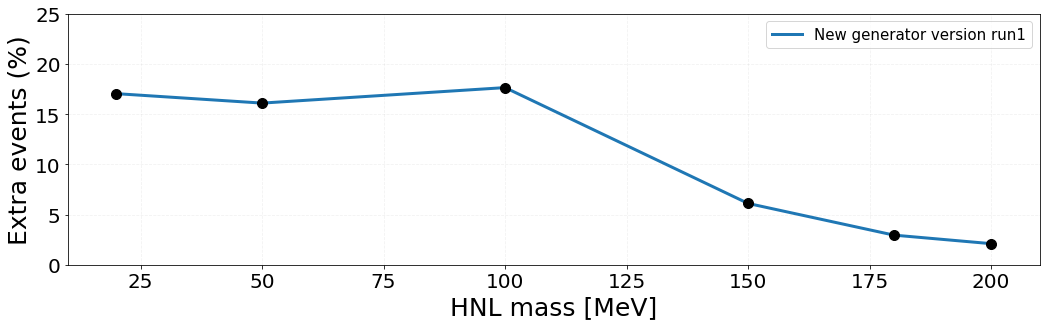

In [57]:

plt.plot(HNL_masses, SF_list, label="New generator version run1", lw=3)

for count, HNL_mass in enumerate(HNL_masses):
    plt.plot(HNL_mass, SF_list[count],marker="o",markersize=10, color="black")

plt.xlabel('HNL mass [MeV]',fontsize=25)
plt.ylabel(r'Extra events (%)',fontsize=25)
plt.legend()
plt.ylim(0,25)
#plt.xlim(0,0.45)$
plt.xlim(10,210)
plt.grid(ls='--',color='C7',alpha=0.1)
# plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# plt.legend(prop={'size': 16}, loc="lower left")
plt.tight_layout()
# plt.savefig('plots/Generator/New_generator_version_events_fraction.pdf',bbox_inches='tight', pad_inches=0.3)
# plt.savefig('plots/Generator/New_generator_version_events_fraction.png',bbox_inches='tight', pad_inches=0.3)

In [36]:
loc_dict = {"overlay":'../NuMI_MC/SLIMMED_neutrinoselection_filt_run1_overlay.root',
            "dirt":'../NuMI_MC/neutrinoselection_filt_run1_dirt_overlay.root',
            "ext":'../NuMI_data/neutrinoselection_filt_run1_beamoff.root'}

events_dict = {}

for file in loc_dict:

    file_type = file #"signal", "overlay" or "dirt"
    Run="run1"
    POT, events = Single_file_POT_events(loc_dict[file])
    events_dict[file] = events
    SF = Single_file_POT_scaling(POT, Run, file_type)
    scaled_events = events*SF
    
    print(f"{Run} {file} has {round(scaled_events)} scaled events")

run1 overlay has 78298 scaled events
run1 dirt has 51034 scaled events
No POT for this file. Assuming EXT file.
run1 ext has 507536 scaled events


In [35]:
loc_dict = {"overlay":'../NuMI_MC/SLIMMED_neutrinoselection_filt_run3_overlay.root',
            "dirt":'../NuMI_MC/neutrinoselection_filt_run3_dirt_overlay.root',
            "ext":'../NuMI_data/neutrinoselection_filt_run3_beamoff.root'}

events_dict = {}

for file in loc_dict:

    file_type = file #"signal", "overlay" or "dirt"
    Run="run3"
    POT, events = Single_file_POT_events(loc_dict[file])
    events_dict[file] = events
    SF = Single_file_POT_scaling(POT, Run, file_type)
    scaled_events = events*SF
    
    print(f"{Run} {file} has {round(scaled_events)} scaled events")

run3 overlay has 188176 scaled events
run3 dirt has 65992 scaled events
No POT for this file. Assuming EXT file.
run3 ext has 1802096 scaled events


## Reading in all files, giving all SF (old code)

In [5]:
#This reads in the MC overlay, MC dirt overlay, EXT, data and signal samples for NuMI run1 or run3
#HNL_masses = Constants.HNL_mass_samples #in MeV

Run = "run1" #so far either "run1" or "run3"

Load_pi0_samples = True

FLATTEN = False

root_dir = 'nuselection'
POT_tree = 'SubRun' #Branch for POT
MC_samples_dir = '../NuMI_MC/'
data_samples_dir = '../NuMI_data/'
signal_samples_dir = '../NuMI_signal/KDAR_dump/sfnues/'

loc_overlay_run1 = MC_samples_dir+'SLIMMED_neutrinoselection_filt_run1_overlay.root'#NuMI Run1 MC WITHOUT systematics weights
loc_dirt_run1 = MC_samples_dir+'neutrinoselection_filt_run1_dirt_overlay.root'
loc_EXT_run1 = data_samples_dir+'neutrinoselection_filt_run1_beamoff.root'
loc_beamgood_run1 = data_samples_dir+'neutrinoselection_filt_run1_beamon_beamgood.root'

loc_overlay_run3 = MC_samples_dir+'SLIMMED_neutrinoselection_filt_run3_overlay.root' #NuMI Run3 MC WITHOUT systematics weights
loc_dirt_run3 = MC_samples_dir+'neutrinoselection_filt_run3_dirt_overlay.root'
loc_EXT_run3 = data_samples_dir+'neutrinoselection_filt_run3_beamoff.root'
loc_beamgood_run3 = data_samples_dir+'neutrinoselection_filt_run3_beamon_beamgood.root'

print("Opening Run1 samples with uproot")
NuMI_MC_overlay_run1 = uproot3.open(loc_overlay_run1)[root_dir+'/'+POT_tree]
NuMI_MC_dirt_run1 = uproot3.open(loc_dirt_run1)[root_dir+'/'+POT_tree]
NuMI_EXT_run1 = uproot3.open(loc_EXT_run1)[root_dir+'/'+POT_tree]
NuMI_beamgood_run1 = uproot3.open(loc_beamgood_run1)[root_dir+'/'+POT_tree]

signal_samples_dict_run1 = {}
if Load_pi0_samples == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        Signal_run1  = uproot3.open(signal_samples_dir+f'pi0/sfnues_KDAR_dump_{HNL_mass}_pi0_Umu4_majorana_RHC.root')[root_dir+'/'+POT_tree]
        signal_samples_dict_run1[HNL_mass] = Signal_run1
else:
    for HNL_mass in Constants.HNL_mass_samples:
        Signal_run1  = uproot3.open(signal_samples_dir+f'sfnues_KDAR_dump_{HNL_mass}_ee_Umu4_majorana_RHC.root')[root_dir+'/'+POT_tree]
        signal_samples_dict_run1[HNL_mass] = Signal_run1
    
print("Opening Run3 samples with uproot")
NuMI_MC_overlay_run3 = uproot3.open(loc_overlay_run3)[root_dir+'/'+POT_tree]
NuMI_MC_dirt_run3 = uproot3.open(loc_dirt_run3)[root_dir+'/'+POT_tree]
NuMI_EXT_run3 = uproot3.open(loc_EXT_run3)[root_dir+'/'+POT_tree]
NuMI_beamgood_run3 = uproot3.open(loc_beamgood_run3)[root_dir+'/'+POT_tree]

signal_samples_dict_run3 = {}
for HNL_mass in Constants.HNL_mass_samples:
    Signal_run3  = uproot3.open(signal_samples_dir+f'sfnues_KDAR_dump_{HNL_mass}_ee_Umu4_majorana_RHC.root')[root_dir+'/'+POT_tree]
    signal_samples_dict_run3[HNL_mass] = Signal_run3

print("Opened files" + "\n")
print("----RUN1----"+ "\n")
print("----MC OVERLAY BACKGROUND----")
print("Number of branches is " + str(len(NuMI_MC_overlay_run1.keys()))) 
print("Number of subruns is " + str(NuMI_MC_overlay_run1.numentries))
print("----MC DIRT BACKGROUND----")
print("Number of branches is " + str(len(NuMI_MC_dirt_run1.keys()))) 
print("Number of subruns is " + str(NuMI_MC_dirt_run1.numentries))
print("----EXT BACKGROUND----")
print("Number of branches is " + str(len(NuMI_EXT_run1.keys()))) 
print("Number of subruns is " + str(NuMI_EXT_run1.numentries))
print("----DATA----")
print("Number of branches is " + str(len(NuMI_beamgood_run1.keys()))) 
print("Number of subruns is " + str(NuMI_beamgood_run1.numentries))
print("----SIGNAL----")
if Load_pi0_samples == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        print(f"Number of branches in pi0 {HNL_mass}MeV is " + str(len(signal_samples_dict_run1[HNL_mass].keys()))) 
        print(f"Number of subruns in pi0 {HNL_mass}MeV is " + str(signal_samples_dict_run1[HNL_mass].numentries))
else:
    for HNL_mass in Constants.HNL_mass_samples:
        print(f"Number of branches in {HNL_mass}MeV is " + str(len(signal_samples_dict_run1[HNL_mass].keys()))) 
        print(f"Number of subruns in {HNL_mass}MeV is " + str(signal_samples_dict_run1[HNL_mass].numentries))

print()

print("----RUN3----"+ "\n")
print("----MC OVERLAY BACKGROUND----")
print("Number of branches is " + str(len(NuMI_MC_overlay_run3.keys()))) 
print("Number of subruns is " + str(NuMI_MC_overlay_run3.numentries))
print("----MC DIRT BACKGROUND----")
print("Number of branches is " + str(len(NuMI_MC_dirt_run3.keys()))) 
print("Number of subruns is " + str(NuMI_MC_dirt_run3.numentries))
print("----EXT BACKGROUND----")
print("Number of branches is " + str(len(NuMI_EXT_run3.keys()))) 
print("Number of subruns is " + str(NuMI_EXT_run3.numentries))
print("----DATA----")
print("Number of branches is " + str(len(NuMI_beamgood_run3.keys()))) 
print("Number of subruns is " + str(NuMI_beamgood_run3.numentries))
print("----SIGNAL----")
for HNL_mass in Constants.HNL_mass_samples:
    print(f"Number of branches in {HNL_mass}MeV is " + str(len(signal_samples_dict_run3[HNL_mass].keys()))) 
    print(f"Number of subruns in {HNL_mass}MeV is " + str(signal_samples_dict_run3[HNL_mass].numentries))

print()

print("Done!")

Opening Run1 samples with uproot
Opening Run3 samples with uproot
Opened files

----RUN1----

----MC OVERLAY BACKGROUND----
Number of branches is 3
Number of subruns is 59215
----MC DIRT BACKGROUND----
Number of branches is 3
Number of subruns is 13085
----EXT BACKGROUND----
Number of branches is 2
Number of subruns is 158607
----DATA----
Number of branches is 2
Number of subruns is 82200
----SIGNAL----
Number of branches in pi0 150MeV is 3
Number of subruns in pi0 150MeV is 4954
Number of branches in pi0 180MeV is 3
Number of subruns in pi0 180MeV is 4705
Number of branches in pi0 200MeV is 3
Number of subruns in pi0 200MeV is 4637
Number of branches in pi0 220MeV is 3
Number of subruns in pi0 220MeV is 4742
Number of branches in pi0 240MeV is 3
Number of subruns in pi0 240MeV is 4619
Number of branches in pi0 245MeV is 3
Number of subruns in pi0 245MeV is 4713

----RUN3----

----MC OVERLAY BACKGROUND----
Number of branches is 3
Number of subruns is 80063
----MC DIRT BACKGROUND----
Nu

# Checking POT normalisation

In [6]:
def POT_counter_old(df): #This takes dataframe, which I probably don't need to load anymore
    Total_POT = 0
    for i in range(len(df['pot'])):
        Total_POT += df['pot'][i]
    return Total_POT

def POT_counter(file): #Takes uproot file
    Total_POT = file["pot"].array().sum()
    return Total_POT

signal_POT_dict_run1 = {}

#-----Run1-----#
if Load_pi0_samples == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        signal_POT_run1 = POT_counter(signal_samples_dict_run1[HNL_mass])
        signal_POT_dict_run1[HNL_mass] = signal_POT_run1
else:
    for HNL_mass in Constants.HNL_mass_samples:
        signal_POT_run1 = POT_counter(signal_samples_dict_run1[HNL_mass])
        signal_POT_dict_run1[HNL_mass] = signal_POT_run1

overlay_POT_run1 = POT_counter(NuMI_MC_overlay_run1)
dirt_POT_run1 = POT_counter(NuMI_MC_dirt_run1)
#beamgood_POT = POT_counter(df_beamgood_run1) #There is no 'pot' branch for beamgood
OffBeam_EXT_NUMIwin_FEMBeamTriggerAlgo_run1 = 9199232.74 #Taken from the NuMI samples page

#-----Run3-----#
signal_POT_dict_run3 = {}

for HNL_mass in Constants.HNL_mass_samples:
    signal_POT_run3 = POT_counter(signal_samples_dict_run3[HNL_mass])
    signal_POT_dict_run3[HNL_mass] = signal_POT_run3
    

overlay_POT_run3 = POT_counter(NuMI_MC_overlay_run3)
dirt_POT_run3 = POT_counter(NuMI_MC_dirt_run3)
#beamgood_POT = POT_counter(df_beamgood_run1) #There is no 'pot' branch for beamgood
OffBeam_EXT_NUMIwin_FEMBeamTriggerAlgo_run3 = 32878305.25

#Signal
print("----RUN1----"+ "\n")
print('Total signal POTs are: ')
if Load_pi0_samples == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        print(f"{HNL_mass}MeV : "  + str(signal_POT_dict_run1[HNL_mass]))
else:
    for HNL_mass in Constants.HNL_mass_samples:
        print(f"{HNL_mass}MeV : "  + str(signal_POT_dict_run1[HNL_mass]))
print('-------------------')
#Dirt
print('Total dirt POT is ' + str(dirt_POT_run1))
print('-------------------')
#Overlay
print('Total overlay POT is ' + str(overlay_POT_run1))
print('-------------------'+ "\n")
print("----RUN3----"+ "\n")
print('Total signal POTs are: ')
for HNL_mass in Constants.HNL_mass_samples:
    print(f"{HNL_mass}MeV : "  + str(signal_POT_dict_run3[HNL_mass]))
print('-------------------')
#Dirt
print('Total dirt POT is ' + str(dirt_POT_run3))
print('-------------------')
#Overlay
print('Total overlay POT is ' + str(overlay_POT_run3))
print('-------------------')

----RUN1----

Total signal POTs are: 
150MeV : 3.8463033e+26
180MeV : 4.72332e+25
200MeV : 1.7057647e+25
220MeV : 8.0323534e+24
240MeV : 3.8843545e+24
245MeV : 3.492115e+24
-------------------
Total dirt POT is 1.6739124e+21
-------------------
Total overlay POT is 2.3365224e+21
-------------------

----RUN3----

Total signal POTs are: 
2MeV : 9.4376155e+26
10MeV : 4.9289073e+26
20MeV : 8.212824e+32
50MeV : 2.5544397e+30
100MeV : 2.6239244e+28
150MeV : 6.103522e+26
180MeV : 6.3328383e+25
200MeV : 2.3347735e+25
220MeV : 1.0646468e+25
240MeV : 5.250532e+24
245MeV : 4.6062955e+24
-------------------
Total dirt POT is 1.0322625e+21
-------------------
Total overlay POT is 1.9893618e+21
-------------------


In [7]:
Run1_POT = 2e20 #NEEDS TO BE CHECKED, just taken from the NuMI samples page
Run3_POT = 5.0e20 #NEEDS TO BE CHECKED, just taken from the NuMI samples page
OnBeam_EA9CNT_wcut_run1 = 5268051.0 #"Triggers" taken from the NuMI samples page
OnBeam_EA9CNT_wcut_run3 = 10363728.0 #"Triggers" taken from the NuMI samples page
BeamOff_scaling_for_nus = 0.98 #This Factor described by Owen: 
# An additional scaling
# factor of 0.98 is applied to the Beam-off sample to take
# into account that 2% of all NuMI Beam-on events are
# expected to contain a neutrino interaction
DIRT_run1_scaling = 0.75 #NOT SURE where this comes from, apparently it is standard procedure for NuMI DIRT
DIRT_run3_scaling = 0.35 #NOT SURE where this comes from, apparently it is standard procedure for NuMI DIRT
NuMI_KDAR_scaling_run1 = 8.0 #This comes from the discrepancy between numu flux from KDAR dump between Geant4 and MiniBooNE measurement. Taken from Owen's thesis
NuMI_KDAR_scaling_run3 = 8.6

run1_POT_scaling_dict = {}
run3_POT_scaling_dict = {}

#Calculation of POT scaling factors
if Load_pi0_samples == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        SF_signal_run1 = (Run1_POT/signal_POT_dict_run1[HNL_mass])*NuMI_KDAR_scaling_run1
        run1_POT_scaling_dict[HNL_mass] = SF_signal_run1
else:
    for HNL_mass in Constants.HNL_mass_samples:
        SF_signal_run1 = (Run1_POT/signal_POT_dict_run1[HNL_mass])*NuMI_KDAR_scaling_run1
        run1_POT_scaling_dict[HNL_mass] = SF_signal_run1
        
SF_overlay_run1 = Run1_POT/overlay_POT_run1
SF_dirt_run1 = (Run1_POT/dirt_POT_run1)*DIRT_run1_scaling
SF_EXT_run1 = (OnBeam_EA9CNT_wcut_run1/OffBeam_EXT_NUMIwin_FEMBeamTriggerAlgo_run1)*BeamOff_scaling_for_nus
    
for HNL_mass in Constants.HNL_mass_samples:
    SF_signal_run3 = (Run3_POT/signal_POT_dict_run3[HNL_mass])*NuMI_KDAR_scaling_run3
    run3_POT_scaling_dict[HNL_mass] = SF_signal_run3
    
SF_overlay_run3 = Run3_POT/overlay_POT_run3
SF_dirt_run3 = (Run3_POT/dirt_POT_run3)*DIRT_run3_scaling
SF_EXT_run3 = (OnBeam_EA9CNT_wcut_run3/OffBeam_EXT_NUMIwin_FEMBeamTriggerAlgo_run3)*BeamOff_scaling_for_nus


print("The following factors can be applied to the full samples, i.e they are not event-dependent")
print()
print('For Run1 the scale factors are: ')
print('Overlay: ' + str(SF_overlay_run1))
print('Dirt: ' + str(SF_dirt_run1))
print('EXT: ' + str(SF_EXT_run1))
print('Signal: ')
if Load_pi0_samples == True:
    for HNL_mass in Constants.HNL_mass_pi0_samples:
        print(f"{HNL_mass}MeV " + str(run1_POT_scaling_dict[HNL_mass]))
else:
    for HNL_mass in Constants.HNL_mass_samples:
        print(f"{HNL_mass}MeV " + str(run1_POT_scaling_dict[HNL_mass]))

print()
print('For Run3 the scale factors are: ')
print('Overlay: ' + str(SF_overlay_run3))
print('Dirt: ' + str(SF_dirt_run3))
print('EXT: ' + str(SF_EXT_run3))
print('Signal: ')
for HNL_mass in Constants.HNL_mass_samples:
    print(f"{HNL_mass}MeV " + str(run3_POT_scaling_dict[HNL_mass]))
    

The following factors can be applied to the full samples, i.e they are not event-dependent

For Run1 the scale factors are: 
Overlay: 0.08559729716258113
Dirt: 0.08961042376561343
EXT: 0.5612087579382191
Signal: 
150MeV 4.159838350914407e-06
180MeV 3.38744768337177e-05
200MeV 9.379957491349839e-05
220MeV 0.00019919442304235102
240MeV 0.00041190884760711096
245MeV 0.000458175050366498

For Run3 the scale factors are: 
Overlay: 0.2513368817255014
Dirt: 0.16953052634982632
EXT: 0.3089104916683624
Signal: 
2MeV 4.55623564219535e-06
10MeV 8.724043160892894e-06
20MeV 5.235714406049288e-12
50MeV 1.6833437060203603e-09
100MeV 1.638766739864928e-07
150MeV 7.045112441597867e-06
180MeV 6.790004454782067e-05
200MeV 0.0001841720407411439
220MeV 0.00040388981532410006
240MeV 0.0008189646415804218
245MeV 0.0009335050190166368


## 10 event limit

In [52]:
#Starting with only run3
thetas = Constants.theta_mu_4_dict
run1_POT_scaling_dict = Constants.run1_POT_scaling_dict
run3_POT_scaling_dict = Constants.run3_POT_scaling_dict
HNL_masses = []
thetas_for_10ev = []

for HNL_mass in Constants.HNL_mass_samples:
    NumEvs = events_dict_2[HNL_mass]*run3_POT_scaling_dict[HNL_mass]
    theta_squared = thetas[HNL_mass]**2
    theta_for_10ev = np.sqrt(10/NumEvs)*theta_squared
    HNL_masses.append(HNL_mass)
    thetas_for_10ev.append(theta_for_10ev)
    
r = zip(HNL_masses, thetas_for_10ev)
with open(f'limit_files/10_event_expected_mu_run3.csv', "w") as s:
    w = csv.writer(s)
    for row in r:
        w.writerow(row)

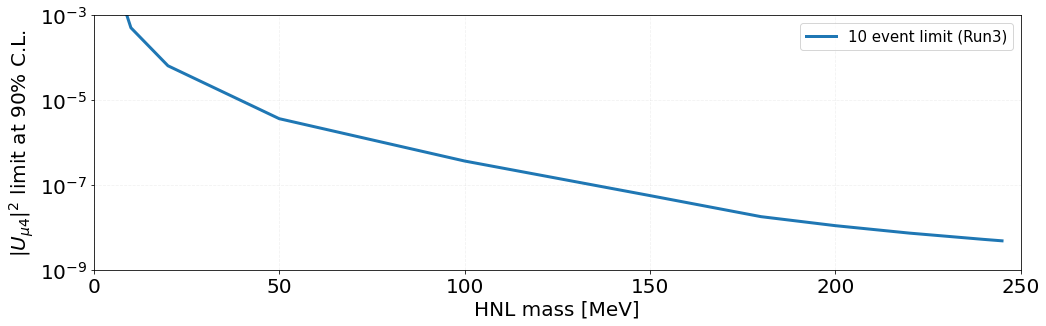

In [48]:
plt.plot(HNL_masses, thetas_for_10ev, label="10 event limit (Run3)", lw=3)
plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
plt.ylim(1e-9,1e-3)
#plt.xlim(0,0.45)$
plt.xlim(0,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# plt.legend(prop={'size': 16}, loc="lower left")
plt.tight_layout()

## Background Overlay Detector Variation POTs

In [12]:
run1_DetVar_POT_dict = {}
run3_DetVar_POT_dict = {}

for DetVar in Constants.Detector_variations:
    NuMI_MC_overlay_run1 = uproot3.open(f"../NuMI_MC/DetVars/neutrinoselection_filt_run1_overlay_{DetVar}.root")[root_dir+'/'+POT_tree]
    NuMI_MC_overlay_run3 = uproot3.open(f"../NuMI_MC/DetVars/neutrinoselection_filt_run3_overlay_{DetVar}.root")[root_dir+'/'+POT_tree]
    
    run1_POT = POT_counter(NuMI_MC_overlay_run1)
    run3_POT = POT_counter(NuMI_MC_overlay_run3)
    
    run1_DetVar_POT_dict[DetVar] = run1_POT
    run3_DetVar_POT_dict[DetVar] = run3_POT

print("-----Run1-----")
for DetVar in Constants.Detector_variations:
    print(f"{DetVar} POT: " + str(run1_DetVar_POT_dict[DetVar]))
    
print("-----Run3-----")
for DetVar in Constants.Detector_variations:
    print(f"{DetVar} POT: " + str(run3_DetVar_POT_dict[DetVar]))

-----Run1-----
WireModX POT: 3.674915e+20
WireModYZ POT: 3.6984897e+20
WireModThetaXZ POT: 3.6800767e+20
WireModThetaYZ POT: 3.6899554e+20
WireModdEdX POT: 3.6687188e+20
LYDown POT: 3.565986e+20
LYRayleigh POT: 3.689257e+20
LYAttenuation POT: 3.6420737e+20
SCE POT: 3.711389e+20
Recomb2 POT: 3.7210774e+20
CV POT: 3.6898442e+20
-----Run3-----
WireModX POT: 3.2428648e+20
WireModYZ POT: 3.3639856e+20
WireModThetaXZ POT: 3.2002685e+20
WireModThetaYZ POT: 3.357618e+20
WireModdEdX POT: 3.1726403e+20
LYDown POT: 2.809705e+20
LYRayleigh POT: 2.8104991e+20
LYAttenuation POT: 3.31176e+20
SCE POT: 3.332822e+20
Recomb2 POT: 3.2953834e+20
CV POT: 2.7154326e+20


## Events numbers Detector variations

In [5]:
main_tree = 'NeutrinoSelectionFilter'

run1_DetVar_events_dict = {}
run3_DetVar_events_dict = {}

for DetVar in Constants.Detector_variations:
    NuMI_MC_overlay_run1 = uproot3.open(f"../NuMI_MC/DetVars/neutrinoselection_filt_run1_overlay_{DetVar}.root")[root_dir+'/'+main_tree]
    NuMI_MC_overlay_run3 = uproot3.open(f"../NuMI_MC/DetVars/neutrinoselection_filt_run3_overlay_{DetVar}.root")[root_dir+'/'+main_tree]
    
    run1_events = len(NuMI_MC_overlay_run1)
    run3_events = len(NuMI_MC_overlay_run3)
    
    run1_DetVar_events_dict[DetVar] = run1_events
    run3_DetVar_events_dict[DetVar] = run3_events

print("-----Run1-----")
for DetVar in Constants.Detector_variations:
    print(f"{DetVar} events: " + str(run1_DetVar_events_dict[DetVar]))
    
print("-----Run3-----")
for DetVar in Constants.Detector_variations:
    print(f"{DetVar} events: " + str(run3_DetVar_events_dict[DetVar]))

-----Run1-----
WireModX events: 143911
WireModYZ events: 144835
WireModThetaXZ events: 144108
WireModThetaYZ events: 144450
WireModdEdX events: 143651
LYDown events: 139665
LYRayleigh events: 144453
LYAttenuation events: 142616
SCE events: 145374
Recomb2 events: 145748
CV events: 144492
-----Run3-----
WireModX events: 121963
WireModYZ events: 126508
WireModThetaXZ events: 120373
WireModThetaYZ events: 126289
WireModdEdX events: 119376
LYDown events: 105752
LYRayleigh events: 105890
LYAttenuation events: 124575
SCE events: 125360
Recomb2 events: 124047
CV events: 102239


In [8]:
ext_loc = f'../NuMI_data/neutrinoselection_filt_'+"run3"+'_beamoff.root'

NuMI_EXT_run1 = uproot3.open(ext_loc)[root_dir+'/'+main_tree]
# NuMI_MC_overlay_run3 = uproot3.open(ext_loc)[root_dir+'/'+main_tree]
    
run1_events = len(NuMI_EXT_run1)
print(run1_events)

3211097


## Finished code